In [1]:
# importing the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# get the data and save it into a dataframe.
df= pd.read_excel('Used_Car_Dataset.xlsx')
df

,Unnamed: 0,Year,Brand,Model,Fuel Type,Transmission,Engine Capacity,Kms Driven,No. of Owners,Location,Price
0,0,2020,Jeep,Jeep Compass 1.4 LIMITED PLUS AT,Petrol,AUTOMATIC,NaN,"52,301",1st,Pune,1988699.0
1,1,2020,Mercedes-benz,Mercedes-benz C-class Progressive C 200,Petrol,Manual,1950.0,"18,000",First,New Delhi,4700000.0
2,2,2018,Hyundai,Hyundai I20 Active 1.2 S,Petrol,Manual,1197.0,"53,647",First,Kolkata,590000.0
3,3,2018,Hyundai,Hyundai Creta 1.6 Crdi At Sx Plus,Diesel,Automatic,1582.0,"36,000",First,Bangalore,1499000.0
4,4,2012,Maruti,Maruti Wagon R 1.0 VXI,Petrol,MANUAL,NaN,"25,674",2nd,Pune,336999.0
...,...,...,...,...,...,...,...,...,...,...,...
20906,20906,2018,Tata,Tata NEXON XZA+ 1.5,Diesel,AUTOMATIC,NaN,"13,704",2nd,Pune,1027299.0
20907,20907,2016,Maruti,Maruti Baleno Delta Cvt,Petrol,Manual,1197.0,"26,700",First,Gurgaon,675000.0
20908,20908,2009,Toyota,Toyota Corolla Altis G,Petrol,Manual,1798.0,"80,000",First,Bangalore,460000.0
20909,20909,2014,Honda,Honda Amaze Ex I-vtech,Petrol,Manual,1198.0,"25,000",First,Kolkata,325000.0


In [3]:
# drop the 'Unnamed: 0' column.
df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
# check for duplicate entries.
df.duplicated().value_counts()

False    19476
True      1435
dtype: int64

In [5]:
# drop the duplicate entries.
df.drop_duplicates(inplace=True,ignore_index=True)

In [6]:
# check for null values.
df.isnull().sum()

Year                  0
Brand                 0
Model                 0
Fuel Type           366
Transmission        366
Engine Capacity    4887
Kms Driven            0
No. of Owners         0
Location              0
Price                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19476 entries, 0 to 19475
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             19476 non-null  int64  
 1   Brand            19476 non-null  object 
 2   Model            19476 non-null  object 
 3   Fuel Type        19110 non-null  object 
 4   Transmission     19110 non-null  object 
 5   Engine Capacity  14589 non-null  float64
 6   Kms Driven       19476 non-null  object 
 7   No. of Owners    19476 non-null  object 
 8   Location         19476 non-null  object 
 9   Price            19476 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.5+ MB


In [8]:
# check the number of unique values in 'Fuel Type' column.
df['Fuel Type'].unique()

array(['Petrol', 'Diesel', nan], dtype=object)

In [9]:
# check the number of unique values in 'Transmission' column.
df['Transmission'].unique()

array(['AUTOMATIC', 'Manual', 'Automatic', 'MANUAL', nan, 'TONE', 'RTQ',
       'MT', 'AT', 'L', 'RHYTM', 'DCT', 'VXI', 'Petrol', 'IMT', '1.0',
       '7STR', '1.3', 'SHVS', 'MOMENTUM', 'AMT', '1.5D', '1.2', 'RTN',
       'CVT', 'i-VTEC', 'PETROL', 'DIESEL', '6STR', 'CNG', '10',
       'EDITION', 'OPT', '1.2RTN', 'STR'], dtype=object)

In [10]:
# map all the values in 'Transmission' column to two values, A: Automatic, M: Manual. Irrelevant entries are replaced by nan.
trnsmsn_dict={'Manual':'M','Automatic':'A','MANUAL':'M','AUTOMATIC':'A','MT':'M','AMT':'A','IMT':'A','DCT':'A','1.0':'A',
              '1.2':'M','CVT':'A','CVT':'A','i-VTEC':'A'}
df['Transmission']=df['Transmission'].map(trnsmsn_dict)
df['Transmission'].unique()

array(['A', 'M', nan], dtype=object)

In [11]:
# Entries in 'Kms Driven' column are in text format.
df['Kms Driven'][0:5]

0    52,301
1    18,000
2    53,647
3    36,000
4    25,674
Name: Kms Driven, dtype: object

In [12]:
# remove the ',' from the entries of 'Kms Driven'.
kms_list=[]
for i in range(len(df['Kms Driven'])):
    value=df['Kms Driven'][i].replace(',','')
    kms_list.append(value)
kms_list[0:5]

['52301', '18000', '53647', '36000', '25674']

In [13]:
# Convert to numeric type.
df['Kms Driven']= pd.to_numeric(kms_list)

In [14]:
# Check the number of unique entries in 'No. of Owners' column.
df['No. of Owners'].unique()

array(['1st', 'First', '2nd', 'Second', 'Third', 'Fourth', '3rd',
       'Unregistered Car', 'Fifth'], dtype=object)

In [15]:
# Encode all the values using map function.
owners_dict= {'1st':1,'2nd':2,'3rd':3,
              'First':1, 'Second':2, 'Third':3, 'Fourth':4, 'Fifth':5,
              'Unregistered Car':0}
df['No. of Owners']=df['No. of Owners'].map(owners_dict)
df.head()

,Year,Brand,Model,Fuel Type,Transmission,Engine Capacity,Kms Driven,No. of Owners,Location,Price
0,2020,Jeep,Jeep Compass 1.4 LIMITED PLUS AT,Petrol,A,NaN,52301,1,Pune,1988699.0
1,2020,Mercedes-benz,Mercedes-benz C-class Progressive C 200,Petrol,M,1950.0,18000,1,New Delhi,4700000.0
2,2018,Hyundai,Hyundai I20 Active 1.2 S,Petrol,M,1197.0,53647,1,Kolkata,590000.0
3,2018,Hyundai,Hyundai Creta 1.6 Crdi At Sx Plus,Diesel,A,1582.0,36000,1,Bangalore,1499000.0
4,2012,Maruti,Maruti Wagon R 1.0 VXI,Petrol,M,NaN,25674,2,Pune,336999.0


In [16]:
df.describe().T
# 'Engine Capacity' column has minimum value=0, which is not possible for a working car.
# 'Kms Driven' column has maximum value=74 lakh. This is not a realistic number. 

,count,mean,std,min,25%,50%,75%,max
Year,19476.0,2.016148e+03,3.438776e+00,1990.0,2014.0,2017.0,2019.0,2022.0
Engine Capacity,14589.0,1.565845e+03,5.631199e+02,0.0,1197.0,1462.0,1956.0,6749.0
Kms Driven,19476.0,5.303756e+04,1.228260e+05,72.0,27000.0,47421.5,70000.0,7400000.0
No. of Owners,19476.0,1.251694e+00,5.157441e-01,0.0,1.0,1.0,1.0,5.0
Price,19476.0,1.034578e+06,1.275901e+06,30000.0,425000.0,645000.0,1093474.0,27100000.0


In [17]:
df= df[df['Engine Capacity']!=0]

In [18]:
df[df['Kms Driven']>1*10**6]

,Year,Brand,Model,Fuel Type,Transmission,Engine Capacity,Kms Driven,No. of Owners,Location,Price
2781,2015,Bmw,Bmw 5 Series 525d Luxury Line,Diesel,A,1995.0,7400000,2,Pune,2175000.0
7266,2015,Bmw,Bmw 5 Series 525d Luxury Line,Diesel,A,1995.0,7400000,2,Noida,2175000.0
8022,2007,Maruti,Maruti Wagon R Duo Lpg,NaN,NaN,998.0,1120000,1,Hyderabad,185000.0
10007,2015,Bmw,Bmw 5 Series 525d Luxury Line,Diesel,A,1995.0,7400000,2,Gurgaon,2175000.0
12934,2015,Bmw,Bmw 5 Series 525d Luxury Line,Diesel,A,1995.0,7400000,2,Mumbai,2175000.0
18172,2015,Bmw,Bmw 5 Series 525d Luxury Line,Diesel,A,1995.0,7400000,2,New Delhi,2175000.0


In [19]:
df= df[df['Kms Driven']<1*10**6]

In [20]:
df.reset_index(inplace=True,drop=True)

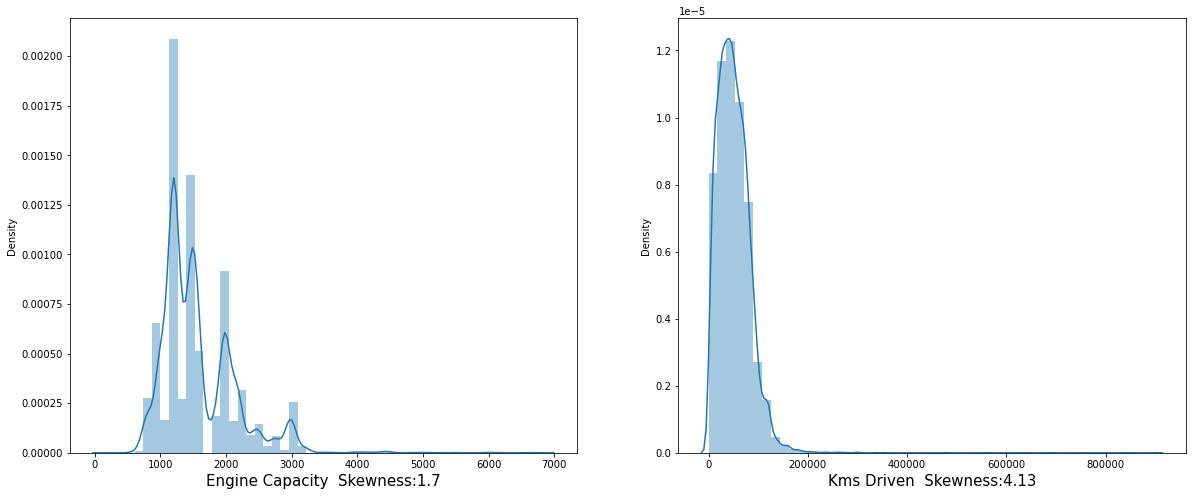

In [21]:
# Distribution plots of the columns with continuous data.
cont_features= ['Engine Capacity','Kms Driven']
plt.figure(figsize=(20,8))
plotnumber=1
for feature in cont_features:
    if plotnumber<=2:
        ax= plt.subplot(1,2,plotnumber)
        sns.distplot(df[feature])
        plt.xlabel(feature+'  Skewness:'+str(round(df[feature].skew(),2)),fontsize=15)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='Year', ylabel='count'>

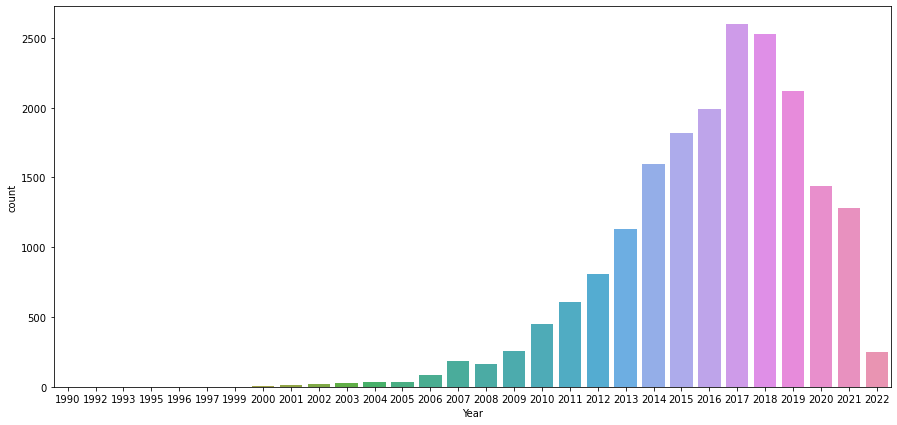

In [22]:
# Count plot of 'Year' column.
plt.figure(figsize=(15,7))
sns.countplot(df['Year'])

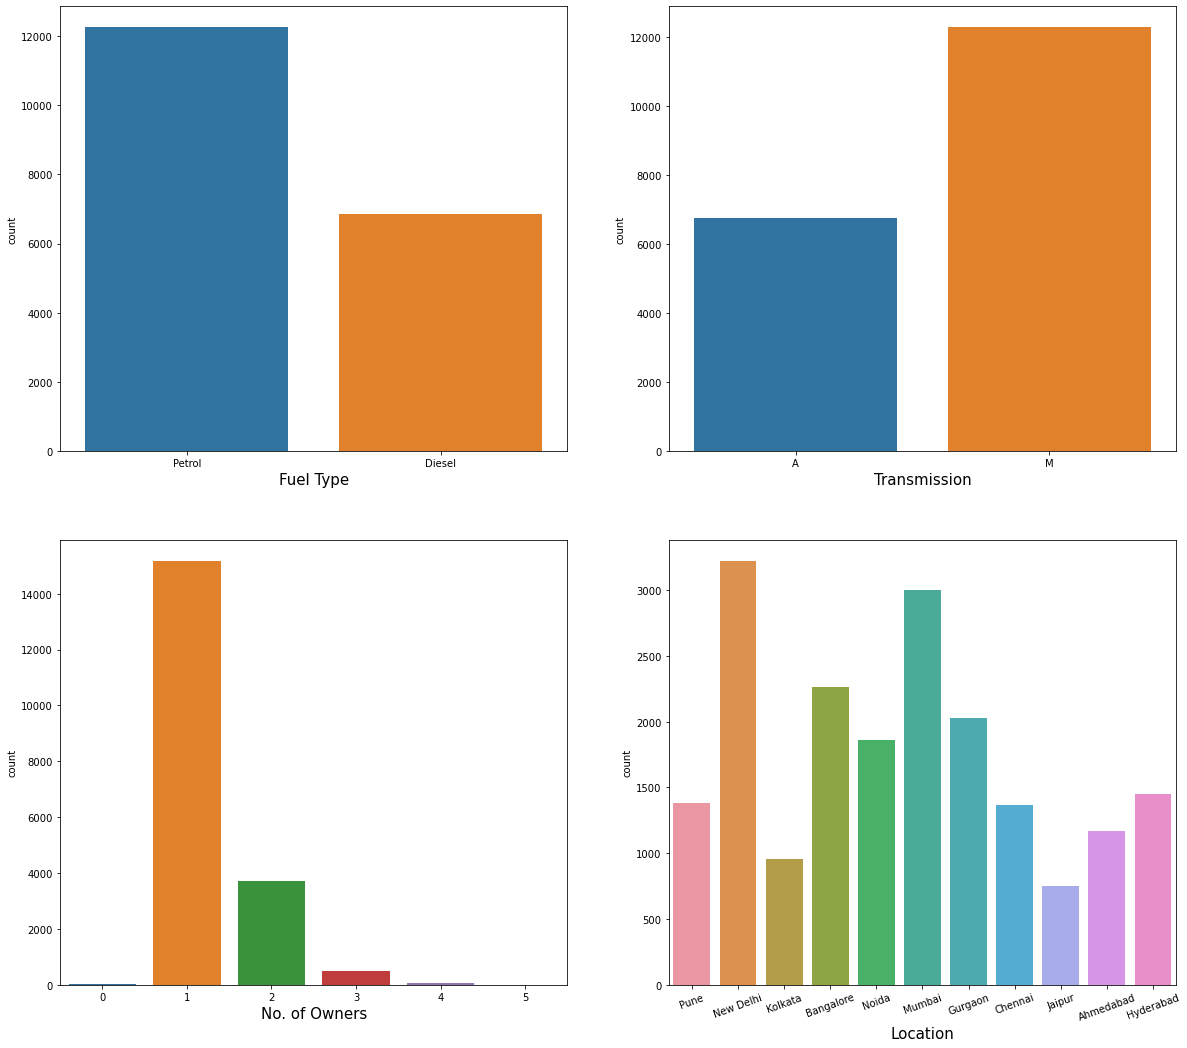

In [23]:
# Count plots of other categorical columns.
cat_features= ['Fuel Type','Transmission','No. of Owners','Location']
plt.figure(figsize=(20,18))
plotnumber=1
for feature in cat_features:
    if plotnumber<=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.countplot(df[feature])
        plt.xlabel(feature,fontsize=15)
        if feature=='Location':
            plt.xticks(rotation=20)
    plotnumber+=1
plt.show()

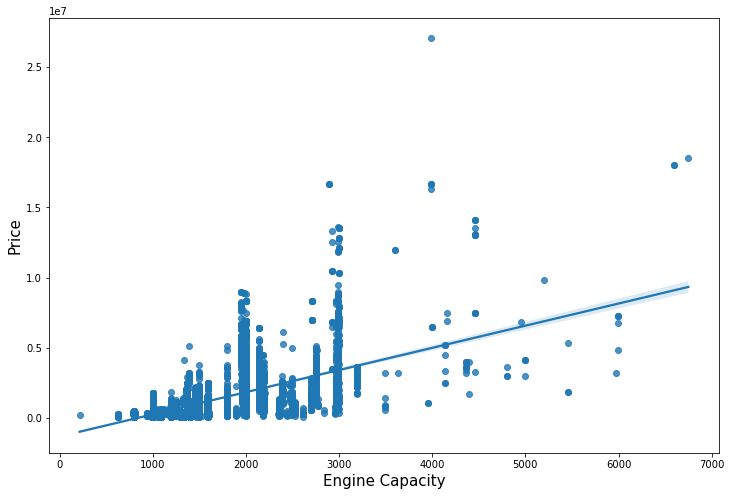

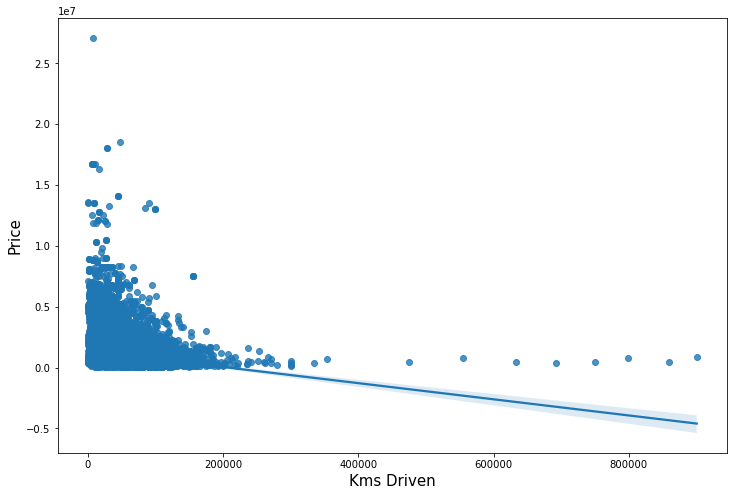

In [24]:
# regplots of the continuous features vs price
for column in cont_features:
    plt.figure(figsize=(12,8))
    sns.regplot(x=column,y='Price',data=df)
    plt.xlabel(column,fontsize=15)
    plt.ylabel('Price',fontsize=15)
    plt.show()

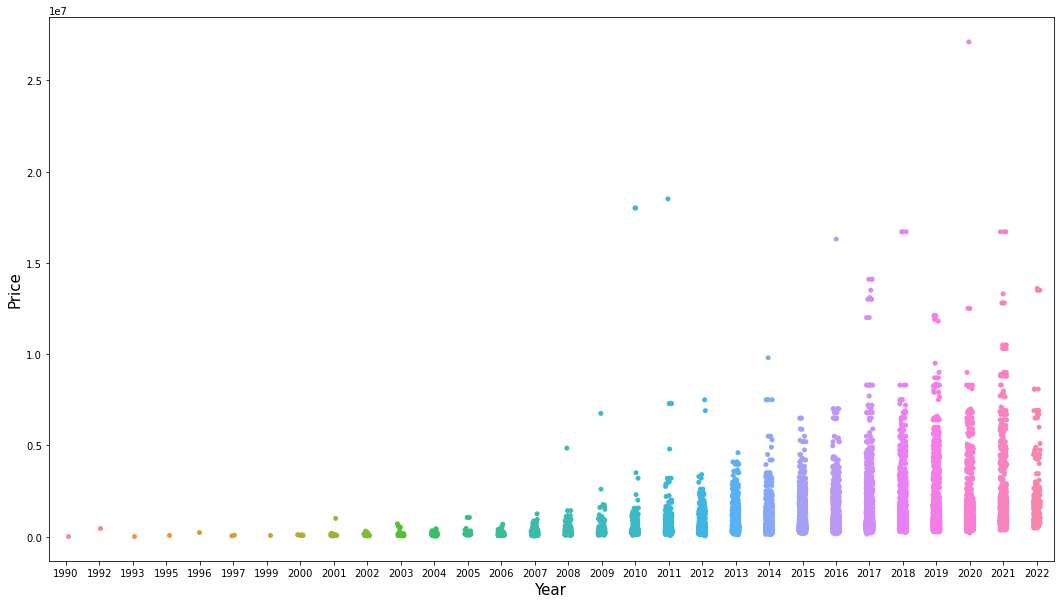

In [25]:
# Stripplot of 'Year' vs 'Price'.
plt.figure(figsize=(18,10))
sns.stripplot(x='Year',y='Price',data=df)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

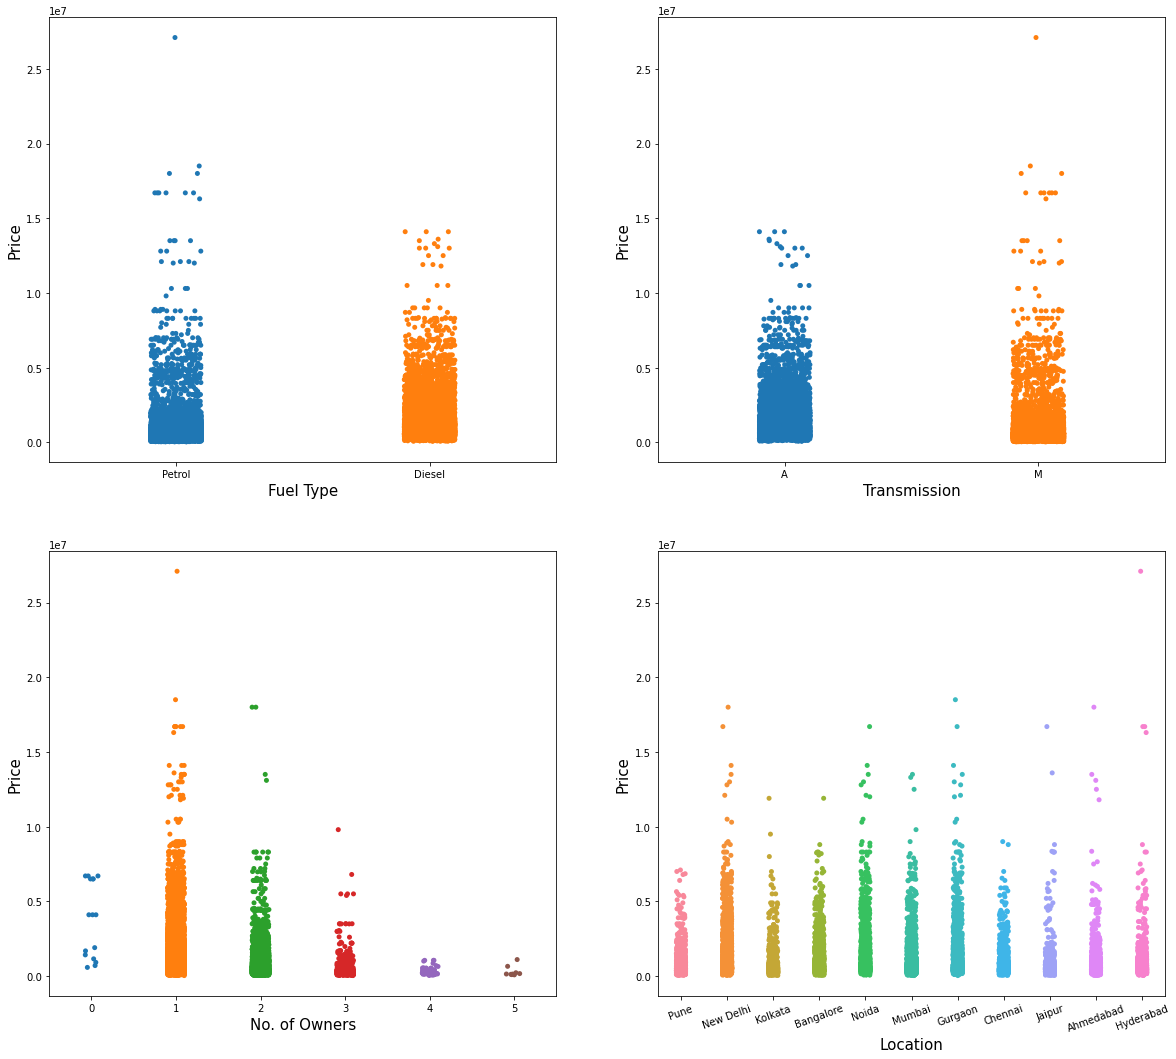

In [26]:
# Strip-plots of the categorical features with respect to the target variable i.e 'Price'.
plt.figure(figsize=(20,18))
plotnumber=1
for i in cat_features:
    plt.subplot(2,2,plotnumber)
    sns.stripplot(x=i,y='Price',data=df)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Price',fontsize=15)
    if i=='Location':
        plt.xticks(rotation=20)
    plotnumber+=1

In [27]:
df.isnull().sum()

Year                  0
Brand                 0
Model                 0
Fuel Type           340
Transmission        405
Engine Capacity    4887
Kms Driven            0
No. of Owners         0
Location              0
Price                 0
dtype: int64

In [28]:
# Imputing the 'Fuel Type' and 'Transmission' columns with their respective mode.
df['Fuel Type']=df['Fuel Type'].fillna(df['Fuel Type'].mode()[0])
df['Transmission']=df['Transmission'].fillna(df['Transmission'].mode()[0])

In [29]:
# Encoding the categorical columns with label encoder.
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

def label_encode(column):
    df[column]= enc.fit_transform(df[[column]])

features_encode=['Brand','Model','Fuel Type','Transmission','Location']
for i in features_encode:
    label_encode(i)
df

,Year,Brand,Model,Fuel Type,Transmission,Engine Capacity,Kms Driven,No. of Owners,Location,Price
0,2020,13,1352,1,0,NaN,52301,1,10,1988699.0
1,2020,23,2493,1,1,1950.0,18000,1,8,4700000.0
2,2018,10,993,1,1,1197.0,53647,1,6,590000.0
3,2018,10,751,0,0,1582.0,36000,1,1,1499000.0
4,2012,20,2360,1,1,NaN,25674,2,10,336999.0
...,...,...,...,...,...,...,...,...,...,...
19440,2018,33,3123,0,0,NaN,13704,2,10,1027299.0
19441,2016,20,1884,1,1,1197.0,26700,1,3,675000.0
19442,2009,34,3277,1,1,1798.0,80000,1,1,460000.0
19443,2014,9,467,1,1,1198.0,25000,1,6,325000.0


In [30]:
# Using KNN Imputer to fillup the missing values in 'Engine Capacity' column.
from sklearn.impute import KNNImputer
imputer_knn= KNNImputer(n_neighbors=5)
imputed_df= pd.DataFrame(imputer_knn.fit_transform(df),columns=df.columns)
df= imputed_df
df.isnull().sum().sum()

0

In [31]:
# check skewness of the two continuous feature columns.
df[cont_features].skew()

Engine Capacity    1.910130
Kms Driven         4.133832
dtype: float64

In [32]:
# Using power transformer to remove skewness.
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method="box-cox")

df['Engine Capacity']= pt.fit_transform(df[['Engine Capacity']])
df['Kms Driven']= pt.fit_transform(df[['Kms Driven']])
df[cont_features].skew()

Engine Capacity   -0.043159
Kms Driven         0.053712
dtype: float64

<AxesSubplot:>

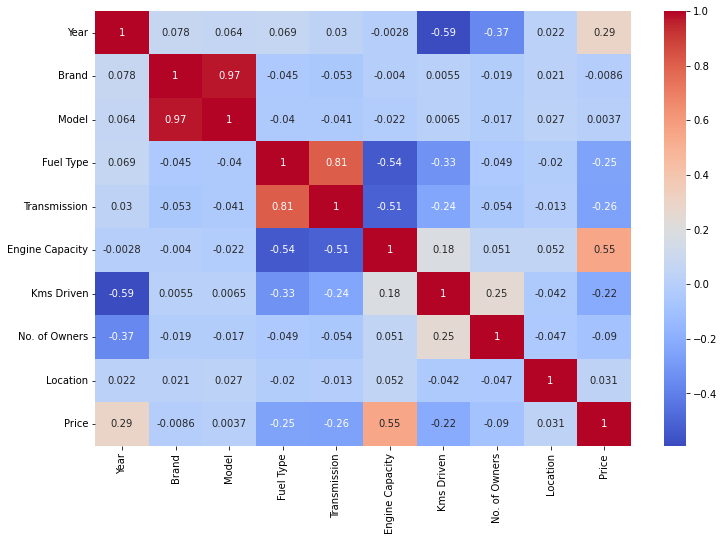

In [33]:
# Let's see the correlation heat-map.
corr_mat=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")

# 'Brand' and 'Model' have a multicollinearity issue.

In [35]:
# Let's check the correlation of various features with the target variable.(Absolute values are shown)
corr_mat=df.corr()
np.abs(corr_mat["Price"]).sort_values(ascending= False)

# 'Brand' and 'Model' columns have a very weak relation with the target variable.

Price              1.000000
Engine Capacity    0.547056
Year               0.292121
Transmission       0.261942
Fuel Type          0.249993
Kms Driven         0.216244
No. of Owners      0.089949
Location           0.031133
Brand              0.008576
Model              0.003713
Name: Price, dtype: float64

In [36]:
# Drop the two columns.
df.drop(columns=['Model','Brand'],inplace=True)

In [37]:
# Separating the features and label.
X= df.drop(columns=['Price'])
y= df['Price']

In [38]:
# applying standard scaler on the features and scaling them.
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [39]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# No multicollinearity issues can be seen.

        vif         Features
0  1.724030             Year
1  3.316042        Fuel Type
2  3.028016     Transmission
3  1.455945  Engine Capacity
4  1.779712       Kms Driven
5  1.164404    No. of Owners
6  1.007689         Location


In [40]:
# Check the R2 score for the different algorithms.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

lr= LinearRegression()
ada = AdaBoostRegressor()
rf= RandomForestRegressor()
xgb_reg= xgb.XGBRegressor()
knr= KNeighborsRegressor()

models = [lr,ada,rf,xgb_reg,knr]

def get_score(model,train_x,test_x,train_y,test_y):
    model.fit(train_x,train_y)
    pred_y= model.predict(test_x)
    accuracy_test = round(r2_score(test_y,pred_y),2)
    return accuracy_test

scores=[[],[],[],[],[]]
for i in range(0,5):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    for model in models:
        score= get_score(model,x_train,x_test,y_train,y_test)
        scores[i].append(score)
        
results= pd.DataFrame(scores,columns=['Linear Regression','Adaboost Regression','Random-Forests Regression','XGBoost Regression'
                                       ,'K-Neighbors Regression'],
                               index=['Train-Test Split 1','Train-Test Split 2','Train-Test Split 3','Train-Test Split 4',
                                      'Train-Test Split 5'])
results

,Linear Regression,Adaboost Regression,Random-Forests Regression,XGBoost Regression,K-Neighbors Regression
Train-Test Split 1,0.41,0.48,0.90,0.88,0.72
Train-Test Split 2,0.39,0.58,0.89,0.90,0.67
Train-Test Split 3,0.42,0.46,0.91,0.91,0.67
Train-Test Split 4,0.44,0.52,0.90,0.90,0.69
Train-Test Split 5,0.42,0.47,0.91,0.92,0.66


In [44]:
# Cross-validation.
cv_scores=[[],[],[],[],[],[]]
count=0
for i in range(5,11):
    if i==5:
        print('Evaluating for 5-Fold...')
    for model in models:
        score= round(cross_val_score(model,X_scaled,y,cv=i,n_jobs=12).mean(),2)
        cv_scores[count].append(score)
    count+=1
    if i==10:
        continue
    print(f'Evaluating for {i+1}-Fold...')
        
cv_results= pd.DataFrame(cv_scores,columns=['Linear Regression','Adaboost Regression','Random-Forests Regression',
                                         'XGBoost Regression','K-Neighbors Regression'],
                                  index=['5-Fold Cross-Validation','6-Fold Cross-Validation','7-Fold Cross-Validation',
                                         '8-Fold Cross-Validation','9-Fold Cross-Validation','10-Fold Cross-Validation'])
cv_results

Evaluating for 5-Fold...
Evaluating for 6-Fold...
Evaluating for 7-Fold...
Evaluating for 8-Fold...
Evaluating for 9-Fold...
Evaluating for 10-Fold...


,Linear Regression,Adaboost Regression,Random-Forests Regression,XGBoost Regression,K-Neighbors Regression
5-Fold Cross-Validation,0.42,0.54,0.90,0.91,0.68
6-Fold Cross-Validation,0.42,0.52,0.90,0.91,0.69
7-Fold Cross-Validation,0.42,0.52,0.90,0.90,0.69
8-Fold Cross-Validation,0.42,0.52,0.90,0.91,0.70
9-Fold Cross-Validation,0.42,0.55,0.91,0.91,0.69
10-Fold Cross-Validation,0.42,0.56,0.90,0.90,0.69


In [92]:
# Hyperparameter tuning of Random-Forests model.
from sklearn.model_selection import GridSearchCV

params= {"n_estimators": [100,250,500,1000],
         "max_depth": [15,17,21,23,None],
         "max_features": [0.5,0.75,1.0],
         "max_samples": [0.5,0.75,1.0]
         }

grd= GridSearchCV(rf, param_grid=params,cv=5,verbose=2,n_jobs=12)
grd.fit(x_train,y_train)
print("Best Parameters:",grd.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters: {'max_depth': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}


In [41]:
# Performance of the tuned random-forests model on a random train test split.
rf_tuned= RandomForestRegressor(max_depth=None,max_features=1.0,max_samples=1.0,n_estimators=100)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=np.random.randint(0,100))

rf_tuned.fit(x_train,y_train)
y_pred_train = rf_tuned.predict(x_train)
accuracy_train = r2_score(y_train,y_pred_train)
y_pred= rf_tuned.predict(x_test)
accuracy_test = r2_score(y_test,y_pred)

print("Training Score:",round(accuracy_train,2))
print("Testing Score: ",round(accuracy_test,2))

Training Score: 0.98
Testing Score:  0.9


In [42]:
# cross-validating the tuned random-forests regression model.
for i in range(5,11):
    cv_score= cross_val_score(rf_tuned,X_scaled,y,cv=i,n_jobs=12).mean()
    print("the cv score for",i,"fold:", round(cv_score,2))

the cv score for 5 fold: 0.9
the cv score for 6 fold: 0.9
the cv score for 7 fold: 0.9
the cv score for 8 fold: 0.9
the cv score for 9 fold: 0.91
the cv score for 10 fold: 0.9


In [104]:
# Hyperparameter tuning of XGBoost model.
params= {"n_estimators": [100,250,500,1000],
         "max_depth": [None,5,6,7,10],
         "learning_rate": [0.1,0.3,0.5,1,None]
         }

grd= GridSearchCV(xgb_reg, param_grid=params,cv=5,verbose=2,n_jobs=12)
grd.fit(x_train,y_train)
print("Best Parameters:",grd.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 1000}


In [43]:
# Performance of the tuned xgboost model on a random train test split.
xgb_tuned= xgb.XGBRegressor(learning_rate=0.1,max_depth=None,n_estimators=1000)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=np.random.randint(0,100))

xgb_tuned.fit(x_train,y_train)
y_pred_train = xgb_tuned.predict(x_train)
accuracy_train = r2_score(y_train,y_pred_train)
y_pred= xgb_tuned.predict(x_test)
accuracy_test = r2_score(y_test,y_pred)

print("Training Score:",round(accuracy_train,2))
print("Testing Score: ",round(accuracy_test,2))

Training Score: 0.99
Testing Score:  0.9


In [44]:
# cross-validating the tuned xgboost regression model.
for i in range(5,11):
    cv_score= cross_val_score(xgb_tuned,X_scaled,y,cv=i,n_jobs=12).mean()
    print("the cv score for",i,"fold:", round(cv_score,2))

the cv score for 5 fold: 0.91
the cv score for 6 fold: 0.92
the cv score for 7 fold: 0.92
the cv score for 8 fold: 0.92
the cv score for 9 fold: 0.92
the cv score for 10 fold: 0.92


In [ ]:
# XGBoost Regressor is giving slightly better results in cross-validation than Random-Forests.

In [45]:
# Saving the tuned XGBoost model.
import pickle 
Car_Price= "Car_Price_model.pickle"
pickle.dump(xgb_tuned,open(Car_Price,'wb'))